## Regularized Linear Regression and Bias v.s. Variance

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.optimize as opt
import scipy.io as from_octave # used to implement mat file type
from sklearn.preprocessing import OneHotEncoder 
import ex5_func as fn
import random as rd

# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'ubuntu'})
% matplotlib inline

## 1 Regularized Linear Regression

In the  first half of the exercise, regularized linear regression is implemented to predict the amount of water flowing out of a dam using the change of water level in a reservoir.  In the next half, some diagnostics of debugging learning algorithms will be employed and the efects of bias v.s. variance will be examined.

## Visualizing the dataset

In [2]:
# Loading Data
directory = os.getcwd() + '/ex5data1.mat'
data = from_octave.loadmat(directory)
print data.keys()
# assign variables
X = np.array(data['X'])
X_val = np.array(data['Xval'])
X_test = np.array(data['Xtest'])
y = np.array(data['y'])
y_val = np.array(data['yval'])
y_test = np.array(data['ytest'])

X.shape, y.shape, X_val.shape, y_val.shape , X_test.shape, y_test.shape

['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']


((12, 1), (12, 1), (21, 1), (21, 1), (21, 1), (21, 1))

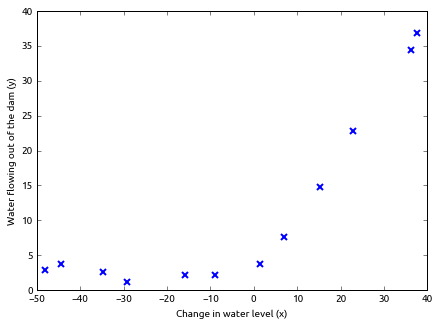

In [3]:
plt.figure(figsize=(7,5))
plt.plot(X,y,'x',mew=2)
plt.xlabel("Change in water level (x)")
plt.ylabel('Water flowing out of the dam (y)')

## Regularized Linear Regression Cost & Gradient

In [4]:
reload(fn)
# initialize theta and lamda
theta = np.array([1,1])
lambda_ = 1.

# add bias units to X
Xb = np.insert(X,0,1,axis=1)

cost ,grad = fn.linearRegCostFunction(theta, Xb, y, lambda_)

print 'Cost at theta = [1 ; 1]: {} '.format(cost)
print 'this value should be about 303.993192'

print '\nGradient at theta = [1 ; 1]: {} '.format(grad.T) 
print '(this value should be about [-15.303016; 598.250744])\n'

Cost at theta = [1 ; 1]: [[ 303.95152555]] 
this value should be about 303.993192

Gradient at theta = [1 ; 1]: [[ -15.30301567  598.25074417]] 
(this value should be about [-15.303016; 598.250744])



## Train Linear Regression

In [5]:
reload(fn)

theta = fn.trainLinearReg(Xb, y, lambda_)

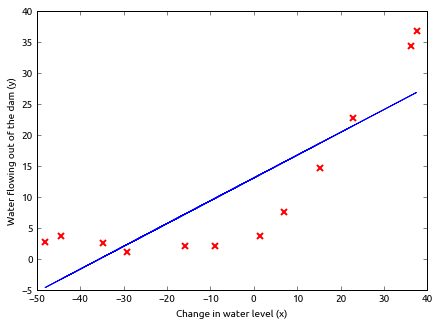

In [6]:
plt.figure(figsize=(7,5))
plt.plot(X,y,'rx',mew=2)
plt.plot(X, Xb.dot(theta),'b')
plt.xlabel("Change in water level (x)")
plt.ylabel('Water flowing out of the dam (y)')

## 2 Bias-variance

## Learning Curve for Linear Regression

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to undefit, while models with high variance overfit to the training data. 

In  this  part  of  the  exercise, training  and  test  errors  are fit on a learning curve to diagnose bias-variance problems.

## Learning curves

In [7]:
# add bias terms to X_val
Xb_val = np.insert(X_val, 0, 1, axis=1)

Training Examples  Train Error  Cross Validation Error

	0	 	0.0 		205.12
	1	 	0.0 		110.3
	2	 	3.29 		45.01
	3	 	2.84 		48.37
	4	 	13.15 		35.87
	5	 	19.44 		33.83
	6	 	20.1 		31.97
	7	 	18.17 		30.86
	8	 	22.61 		31.14
	9	 	23.26 		28.94
	10	 	24.32 		29.55
	11	 	22.37 		29.43


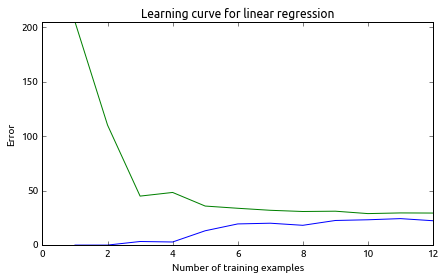

In [8]:
reload(fn)
lambda_ = 0
cost_train, cost_val =fn.learningCurve(Xb, y, Xb_val, y_val, lambda_)